/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

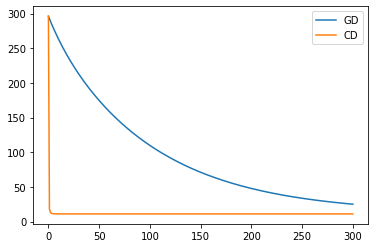

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

#  boston house-prices dataset
data = load_boston()
X, y = data.data, data.target

X = StandardScaler().fit_transform(X)  # for easy convergence
X = np.hstack([X, np.ones((X.shape[0], 1))])

param = np.zeros(X.shape[1])

def costf(X, y, param):
    return np.sum((X.dot(param) - y) ** 2)/(2 * len(y))

def gradient_descent(X, y, param, eta=0.01, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)  # you may want to save initial cost

    for iteration in range(iter):
        h = X.dot(param)
        loss = h - y.ravel()
        gradient = X.T.dot(loss)/(2 * len(y))
        param = param - eta * gradient
        cost = costf(X, y, param)
        #print(cost)
        cost_history[iteration+1] = cost

    return param, cost_history

def coordinate_descent(X, y, param, iter=300):
    cost_history = [0] * (iter+1)
    cost_history[0] = costf(X, y, param)

    for iteration in range(iter):
        for i in range(len(param)):
            dele = np.dot(np.delete(X, i, axis=1), np.delete(param, i, axis=0))
            param[i] = np.dot(X[:,i].T, (y.ravel() - dele))/np.sum(np.square(X[:,i]))
            cost = costf(X, y, param)
            cost_history[iteration+1] = cost

    return param, cost_history

ret, xret = gradient_descent(X, y, param)
cret, cxret = coordinate_descent(X, y, param.copy())

plt.plot(range(len(xret)), xret, label="GD")
plt.plot(range(len(cxret)), cxret, label="CD")
plt.legend()